<a href="https://colab.research.google.com/github/maya2d26/CNN_dog_breed_classifier/blob/work/Stanford_dog_breed_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
import os
import torch
import pandas as pd
import numpy as np
import torchvision
import torch.nn as nn
from torch.utils.data import Dataset, random_split, DataLoader
import matplotlib.pyplot as plt
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms
import torchvision.models as models
from PIL import Image
from collections import OrderedDict
%matplotlib inline

# Reading the data

In [10]:
!rm -r /content/images/.ipynb_checkpoints
!ls /content/images/ -a

.  ..  beagle  pomeranian  siberian_husky


In [16]:
dataset = ImageFolder('/content/images')

describing the dataset

In [58]:
print(dataset.classes)
print(dataset.__len__)

['beagle', 'pomeranian', 'siberian_husky']
<bound method DatasetFolder.__len__ of Dataset ImageFolder
    Number of datapoints: 606
    Root location: /content/images>


let's see an image!

0
500x338


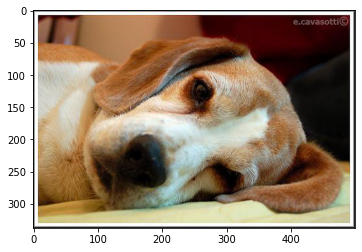

In [57]:
from random import randrange
img, label = dataset.__getitem__(randrange(606))
print(label)
width, height = img.size
print(str(width)+"x"+ str(height))
plt.imshow(img)

# Splitting the data and augmentation

In [95]:
from tqdm import tqdm
from skimage.io import imread, imsave
train_img = []
train_label = []
for img,label in tqdm(dataset):
    train_img.append(img)
    train_label.append(label)

train_x_no_aug = np.array(train_img)
train_y_no_aug = np.array(train_label)
train_x_no_aug.shape, train_y_no_aug.shape

100%|██████████| 606/606 [00:02<00:00, 297.01it/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: The input object of type 'Image' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Image', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  if __name__ == '__main__':


((606,), (606,))

splitting the data

In [96]:
from sklearn.model_selection import train_test_split
train_x_no_aug, test_x, train_y_no_aug, test_y = train_test_split(train_x_no_aug, train_y_no_aug, test_size = 0.2, random_state = 13, stratify=train_y_no_aug)
(train_x_no_aug.shape, train_y_no_aug.shape), (test_x.shape, test_y.shape)

(((484,), (484,)), ((122,), (122,)))

augmenting images

In [97]:
train_x= []
train_y = []
for i in tqdm(range(train_x_no_aug.shape[0])):
    img = train_x_no_aug[i]
    train_x.append(img)
    train_x.append(img.rotate(60))
    train_x.append(np.fliplr(img.rotate(45)))
    train_x.append(np.fliplr(img))
    train_x.append(np.flipud(img))
    for j in range(5):
      train_y.append(train_y_no_aug[i])

len(train_x), len(train_y)

100%|██████████| 484/484 [00:01<00:00, 279.03it/s]


(2420, 2420)

let's see the augmented images!

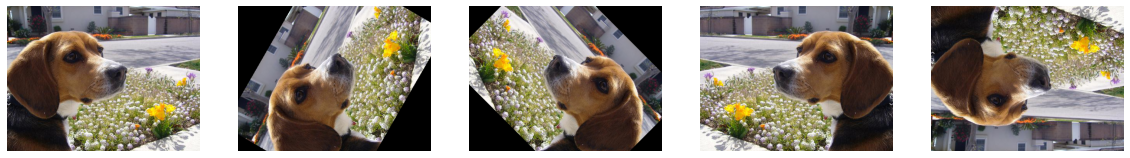

In [105]:
fig,ax = plt.subplots(nrows=1,ncols=5,figsize=(20,20))
dog_num=randrange(484)*5
for i in range(5):
    ax[i].imshow(train_x[i+dog_num])
    ax[i].axis('off')